# 📘 Applied Machine Learning - Week 3

**Neural Networks and Convolutional Neural Networks**

---

## 🚀 Before You Start

### ⚙️ Setup Requirements

1. **Copy Week 2 code** - Create a file `blocks.py` in this folder containing your week 2 implementations
2. **Use NumPy only** - All functions must be implemented using [**NumPy**](https://docs.scipy.org/doc/)

## 📚 Overview

This assignment provides the **building blocks** for **Neural Networks (NNs)**. You'll learn:

- **Fully-connected (Dense) Neural Networks** - Basic network architecture
- **Convolutional Neural Networks (CNNs)** - Image processing networks
- **Optimization Methods** - Training neural networks
- **Image Filtering** - Matrix convolution fundamentals

You'll implement these components from scratch to understand how modern deep learning frameworks work.

---

### 📝 Note

Some concepts may not have been covered in lectures yet. These will be discussed in upcoming sessions.

## 📑 Table of Contents

1. [**Fully-Connected Neural Networks**](#1.-Fully-Connected-Neural-Networks)
   - [1.1 Dense Layer](#1.1-Dense-layer)
   - [1.2 ReLU Nonlinearity](#1.2-ReLU-nonlinearity)
   - [1.3 Sigmoid Nonlinearity](#1.3-Sigmoid-nonlinearity)
   - [1.4 Sequential Model](#1.4-Sequential-model)
   - [1.5 NLL Loss Function](#1.5-NLL-loss-function)
   - [1.6 L₂ Regularization](#1.6-$L_2$-regularization)
   - [1.7 SGD Optimizer](#1.7-SGD-optimizer)
2. [**Experiments**](#2.-Experiments)
3. [**Convolutions**](#3.-Convolutions)
   - [3.1 Matrix Convolution](#3.1-Matrix-convolution)
   - [3.2 Basic Kernels](#3.2-Basic-kernels)
   - [3.3 Convolutional Layer](#3.3-Convolutional-layer)
   - [3.4 Pooling Layer](#3.4-Pooling-layer)
   - [3.5 Flatten](#3.5-Flatten)
4. [**Image Experiments**](#4.-Image-Experiments)

In [1]:
from __future__ import print_function, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import blocks

import automark as am

# fill in you student number as your username
username = "14680300"

# to check your progress, you can run this function
am.get_progress(username)

| Current Assignment Grade 100%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| completed      |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | completed      |
| w2_nll_forward           | completed      |
| w2_nll_grad_input        | completed      |
| w2_sigmoid_forward       | completed      |
| w2_sigmoid_grad_input    | completed      |
| w2_tree_split_data_left  | completed      |
| w2_tree_split_data_right | completed      |
| w2_tree_to_terminal      | completed      |
| w2_tree_weighted_entropy | completed      |
| w3_box_blur              | completed      |
| w3_conv_matrix           | completed      |
| w3_dense_forward         | completed      |
| w3_flatten_forward       | completed      |
| w3_l2_regularizer        | co

## 1. Fully-Connected Neural Networks

---

### 🧠 Neural Network Architecture

**Layer composition:** Each layer is a function with parameters (weights):

$$
h = f(x, w)
$$

where:
- $h$ = layer output
- $x$ = input vector
- $w$ = weight vector

**Network as function composition:**

Neural networks chain layers together:

$$
F = f_k \circ f_{k-1} \circ \dots \circ f_1
$$

$$
\begin{align}
h_1 &= f_1(x, w_1) \\
h_2 &= f_2(h_1, w_2) \\
&\vdots \\
\dot{y} &= f_k(h_{k-1}, w_k)
\end{align}
$$

**Parameters:** Different weight vectors $(w_1, w_2, \ldots, w_k)$ determine the effect of each layer.

> **Note:** "Weights" are sometimes called "parameters", often denoted as $\theta$.

---

### 📉 Loss Functions

**Purpose:** Measure neural network performance

**For classification:** Compare predictions with correct values

**Example - Squared Loss:**

$$
\mathcal{L} = \tfrac{1}{2}\sum_{n = 1}^N (y_n - \dot{y}_n)^2
$$

where:
- $n$ = data point index
- $y_n$ = true value
- $\dot{y}_n$ = predicted value

**Training objective:** **Minimize the loss function**

**Training method:** [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

> **Focus:** This assignment covers the **forward pass**. Backpropagation is implemented for you.

### 1.1 Dense Layer

**Also known as:** Fully-connected layer, Multiplicative layer

**Function:** Transforms input from one dimension to another

$$
H = XW + b
$$

where:
- $H$ = layer output
- $X$ = input matrix of size `(n_objects, d_in)`
- $W$ = weight matrix of size `(d_in, d_out)`
- $b$ = bias vector of size `(d_out,)`

**Element-wise formula:**

$$
H_{nk} = \sum\limits_{i=1}^{d_{in}} X_{ni}W_{ik} + b_k
$$

where:
- $n$ = data object index
- $k$ = $k^{th}$ output dimension

**Example:**

Single-layer network classifying 3D points as -1 or 1:
- Training set: 75 objects
- $X$ shape: `75 × 3`
- $H$ shape: `75 × 1`  
- $W$ shape: `3 × 1`

> **Note:** "Dense Layer" is the same as "Linear" from week 2, but `n_out` is not restricted to 1.

In [19]:
def w3_dense_forward(x_input, W, b):
    """Perform the mapping of the input
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the output of a dense layer
        np.array of size `(n_objects, n_out)`
    """
    output = x_input @ W + b
  
    return output

In [20]:
am.test_student_function(username, w3_dense_forward, ["x_input", "W", "b"])

Running local tests...
w3_dense_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [21]:
am.get_progress(username)

| Current Assignment Grade 78%              |
| w1_L2_regression         | completed      |
| w1_cal_pseudoinverse     | completed      |
| w1_linear_forward        | completed      |
| w2_dist_to_training_samples| completed      |
| w2_linear_forward        | completed      |
| w2_linear_grad_W         | completed      |
| w2_linear_grad_b         | completed      |
| w2_nearest_neighbors     | completed      |
| w2_nll_forward           | completed      |
| w2_nll_grad_input        | completed      |
| w2_sigmoid_forward       | completed      |
| w2_sigmoid_grad_input    | completed      |
| w2_tree_split_data_left  | completed      |
| w2_tree_split_data_right | completed      |
| w2_tree_to_terminal      | completed      |
| w2_tree_weighted_entropy | completed      |
| w3_box_blur              | not attempted  |
| w3_conv_matrix           | not attempted  |
| w3_dense_forward         | completed      |
| w3_flatten_forward       | not attempted  |
| w3_l2_regularizer        | not

### 🔙 Backward Pass (Gradient Computation)

The backward pass computes gradients using the chain rule:

In [22]:
def dense_grad_input(x_input, grad_output, W, b):
    """Calculate the partial derivative of
        the loss with respect to the input of the layer
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with
            respect to the ouput of the dense layer
            np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the partial derivative of the loss with
        respect to the input of the layer
        np.array of size `(n_objects, n_in)`
    """
    grad_input = grad_output.dot(W.T)
    return grad_input

Computing gradients with respect to weights and bias:

In [23]:
def dense_grad_W(x_input, grad_output, W, b):
    """Calculate the partial derivative of
        the loss with respect to W parameter of the layer
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with
            respect to the ouput of the dense layer
            np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the partial derivative of the loss
        with respect to W parameter of the layer
        np.array of size `(n_in, n_out)`
    """
    grad_W = x_input.T.dot(grad_output)
    return grad_W

In [24]:
def dense_grad_b(x_input, grad_output, W, b):
    """Calculate the partial derivative of
        the loss with respect to b parameter of the layer
    # Arguments
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with
            respect to the ouput of the dense layer
            np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    # Output
        the partial derivative of the loss
        with respect to b parameter of the layer
        np.array of size `(n_out,)`
    """
    grad_b = grad_output.sum(0)
    return grad_b

### 🏗️ Dense Layer Class

Below is the complete implementation based on your functions above (already implemented for you):

In [25]:
class Layer(object):

    def __init__(self):
        self.training_phase = True
        self.output = 0.0

    def forward(self, x_input):
        self.output = x_input
        return self.output

    def backward(self, x_input, grad_output):
        return grad_output

    def get_params(self):
        return []

    def get_params_gradients(self):
        return []

In [26]:
class Dense(Layer):

    def __init__(self, n_input, n_output):
        super(Dense, self).__init__()
        # Randomly initializing the weights from normal distribution
        self.W = np.random.normal(scale=0.01, size=(n_input, n_output))
        self.grad_W = np.zeros_like(self.W)
        # initializing the bias with zero
        self.b = np.zeros(n_output)
        self.grad_b = np.zeros_like(self.b)

    def forward(self, x_input):
        self.output = w3_dense_forward(x_input, self.W, self.b)
        return self.output

    def backward(self, x_input, grad_output):
        # get gradients of weights
        self.grad_W = dense_grad_W(x_input, grad_output, self.W, self.b)
        self.grad_b = dense_grad_b(x_input, grad_output, self.W, self.b)
        # propagate the gradient backwards
        return dense_grad_input(x_input, grad_output, self.W, self.b)

    def get_params(self):
        return [self.W, self.b]

    def get_params_gradients(self):
        return [self.grad_W, self.grad_b]

In [27]:
dense_layer = Dense(2, 1)
x_input = np.random.random((3, 2))
y_output = dense_layer.forward(x_input)
print(x_input)
print(y_output)

[[0.41978574 0.70351682]
 [0.71595427 0.74047021]
 [0.86648606 0.06344894]]
[[-0.00289058]
 [-0.00108024]
 [ 0.00567071]]


### 1.2 ReLU Nonlinearity

**Why nonlinearity?** Combining linear layers is still linear:

$$
\begin{align}
H_1 &= XW_1 + b_1\\
H_2 &= H_1W_2 + b_2\\
H_2 &= (XW_1 + b_1)W_2 + b_2 \\
    &= X(W_1W_2) + (b_1W_2 + b_2) \\
    &= XW^* + b^*
\end{align}
$$

**With nonlinearity:**

$$
\begin{align}
H_1 &= XW_1 + b_1\\
H_2 &= f(H_1)W_2 + b_2\\
H_2 &= f(XW_1 + b_1)W_2 + b_2 \neq XW^* + b^*
\end{align}
$$

**ReLU (Rectified Linear Unit):**

Simple, popular nonlinear activation function (no trainable weights):

$$
\text{ReLU}(x) = \max(0, x)
$$

<img src="./src/relu.png" width="500">

**Example:**

$$
\text{ReLU} \left(
\begin{bmatrix}
1 & -0.5 \\
0.3 & 0.1 
\end{bmatrix}
\right) = 
\begin{bmatrix}
1 & 0 \\
0.3 & 0.1 
\end{bmatrix}
$$

Implement the forward pass and backward pass (gradient) for ReLU:

In [28]:
def w3_relu_forward(x_input):
    """relu nonlinearity
    # Arguments
        x_input: np.array of size `(n_objects, n_in)`
    # Output
        the output of relu layer
        np.array of size `(n_objects, n_in)`
    """
    output = np.maximum(0, x_input)
    return output

In [29]:
# test forward pass for ReLU, see example above
x_input = np.array([[1, -0.5], [0.3, 0.1]])

print(w3_relu_forward(x_input))

[[1.  0. ]
 [0.3 0.1]]


In [30]:
am.test_student_function(username, w3_relu_forward, ["x_input"])

Running local tests...
w3_relu_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [31]:
def relu_grad_input(x_input, grad_output):
    """relu nonlinearity gradient.
        Calculate the partial derivative of the loss
        with respect to the input of the layer
    # Arguments
        x_input: np.array of size `(n_objects, n_in)`
            grad_output: np.array of size `(n_objects, n_in)`
    # Output
        the partial derivative of the loss
        with respect to the input of the layer
        np.array of size `(n_objects, n_in)`
    """
    grad_input = grad_output * (x_input > 0)
    return grad_input

In [32]:
class ReLU(Layer):

    def forward(self, x_input):
        self.output = w3_relu_forward(x_input)
        return self.output

    def backward(self, x_input, grad_output):
        return relu_grad_input(x_input, grad_output)

### 1.3 Sigmoid Nonlinearity

Using the sigmoid implementation from week 2:

In [33]:
class Sigmoid(Layer):

    def forward(self, x_input):
        self.output = blocks.w2_sigmoid_forward(x_input)
        return self.output

    def backward(self, x_input, grad_output):
        return blocks.w2_sigmoid_grad_input(x_input, grad_output)

### 1.4 Sequential Model

`SequentialNN` class stores layers and performs basic operations (implemented for you):

In [34]:
class SequentialNN(object):

    def __init__(self, *layers):
        self.layers = layers
        self.training_phase = True

    def set_training_phase(self, is_training=True):
        self.training_phase = is_training
        for layer in self.layers:
            layer.training_phase = is_training

    def forward(self, x_input):
        self.output = x_input
        for layer in self.layers:
            self.output = layer.forward(self.output)
        return self.output

    def backward(self, x_input, grad_output):
        inputs = [x_input] + [l.output for l in self.layers[:-1]]
        for input_, layer_ in zip(inputs[::-1], self.layers[::-1]):
            grad_output = layer_.backward(input_, grad_output)

    def get_params(self):
        params = []
        for layer in self.layers:
            params.extend(layer.get_params())
        return params

    def get_params_gradients(self):
        grads = []
        for layer in self.layers:
            grads.extend(layer.get_params_gradients())
        return grads

### 📊 Example Network Architecture

Simple neural network taking input of shape `(Any, 10)`:

```
  INPUT (Any, 10)
       |
  Dense(10, 4)
       |
     ReLU
       |
  Dense(4, 1)
       |
   Sigmoid
       |
  OUTPUT (Any, 1)
```

In [35]:
nn = SequentialNN(Dense(10, 4), ReLU(), Dense(4, 1), Sigmoid())

In [36]:
nn.forward(np.ones([2, 10]))
### 1.5 NLL Loss Function

#Loss functions compute both value and gradient (implemented for you):


array([[0.50002361],
       [0.50002361]])

In [40]:
class NLL(object):

    def forward(self, target_pred, target_true):
        self.output = blocks.w2_nll_forward(target_pred, target_true)
        return self.output

    def backward(self, target_pred, target_true):
        return blocks.w2_nll_grad_input(target_pred, target_true)

### 1.6 L₂ Regularization

**Purpose:** Penalize model complexity to prevent overfitting

**Problem:** Complex models (many parameters, large weights) can overfit training data

**Solution:** Add regularization term to loss function

**L₂ Regularization (Weight Decay):**

$$
\mathcal{L}^* = \mathcal{L} + \frac{\lambda}{2} \|w\|^2_2
$$

where:
- $\lambda$ = weight decay (hyperparameter controlling regularization strength)
- $\|w\|^2_2$ = squared [Euclidean norm](https://en.wikipedia.org/wiki/Euclidean_distance)

**Expanded form:**

$$
\mathcal{L}^* = \mathcal{L} + \frac{\lambda}{2} \sum\limits_{m=1}^k \|w_m\|^2_2
$$

**Modified weight update:**

$$
\begin{align}
w_m &\leftarrow w_m - \gamma \frac{\partial \mathcal{L}^*}{\partial w_m}\\
\frac{\partial \mathcal{L}^*}{\partial w_m} &= \frac{\partial \mathcal{L}}{\partial w_m} + \lambda w_m\\
w_m &\leftarrow w_m - \gamma \left(\frac{\partial \mathcal{L}}{\partial w_m} + \lambda w_m\right)
\end{align}
$$

**Implement L₂ regularization:**

$$
L_2(\lambda, [w_1, w_2, \dots, w_k]) = \frac{\lambda}{2} \sum\limits_{m=1}^k \|w_m\|^2_2
$$

In [52]:
def w3_l2_regularizer(weight_decay, weights):
    """Compute the L2 regularization term
    # Arguments
        weight_decay: float
        weights: list of arrays of variable sizes
    # Output
        L2 regularization term
        scalar
    """
    output = 0.5 * weight_decay * sum(np.sum(w ** 2) for w in weights)
    return output

### 🧪 Test Case

Expected output: `108.25`

In [53]:
# test the L2 regularizer
weight_decay = 2
weights = [np.array([5, 3, 7, 5, 0.5])]
print(w3_l2_regularizer(weight_decay, weights))

108.25


In [54]:
am.test_student_function(username, w3_l2_regularizer, ["weight_decay", "weights"])

Running local tests...
w3_l2_regularizer successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 1.7 SGD Optimizer

**Stochastic Gradient Descent** - optimization algorithm for training neural networks:

In [55]:
class SGD(object):
    """
    Stochastic gradient descent optimizer
    https://en.wikipedia.org/wiki/Stochastic_gradient_descent
    """

    def __init__(self, model, lr=0.01, weight_decay=0.0):
        self.model = model
        self.lr = lr
        self.weight_decay = weight_decay

    def update_params(self):
        weights = self.model.get_params()
        grads = self.model.get_params_gradients()
        for w, dw in zip(weights, grads):
            update = self.lr * (dw + self.weight_decay * w)
            # it writes the result to the previous variable instead of copying
            np.subtract(w, update, out=w)

## 2. Experiments

---

Let's test our neural network on the 2 circles dataset from week 2:

In [57]:
# some function from week 2
def generate_2_circles(N=100):
    phi = np.linspace(0.0, np.pi * 2, 100)
    X1 = 1.1 * np.array([np.sin(phi), np.cos(phi)])
    X2 = 3.0 * np.array([np.sin(phi), np.cos(phi)])
    Y = np.concatenate([np.ones(N), np.zeros(N)]).reshape((-1, 1))
    X = np.hstack([X1, X2]).T
    return X, Y


def split(X, Y, train_ratio=0.7):
    size = len(X)
    train_size = int(size * train_ratio)
    indices = np.arange(size)
    np.random.shuffle(indices)
    train_indices = indices[:train_size]
    test_indices = indices[train_size:]
    return X[train_indices], Y[train_indices], X[test_indices], Y[test_indices]


def plot_model_prediction(prediction_func, X, Y, hard=True):
    u_min = X[:, 0].min() - 1
    u_max = X[:, 0].max() + 1
    v_min = X[:, 1].min() - 1
    v_max = X[:, 1].max() + 1

    U, V = np.meshgrid(np.linspace(u_min, u_max, 100), np.linspace(v_min, v_max, 100))
    UV = np.stack([U.ravel(), V.ravel()]).T
    c = prediction_func(UV).ravel()
    if hard:
        c = c > 0.5
    plt.scatter(UV[:, 0], UV[:, 1], c=c, edgecolors="none", alpha=0.15)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors="black")
    plt.xlim(left=u_min, right=u_max)
    plt.ylim(bottom=v_min, top=v_max)
    plt.show()

In [58]:
X_train, Y_train, X_test, Y_test = split(*generate_2_circles(), 0.7)

In [68]:
##Training the network ##
###YOUR CODE FOR DESIGNING THE NETWORK ###
model = SequentialNN(
    Dense (2, 16),
    ReLU(),
    Dense (16, 1),
    Sigmoid()
    # 2 -> 16 -> 1 With ReLU and Sigmoid where it is required
)


loss = NLL()
weight_decay = 1e-4
sgd = SGD(model, lr=0.1, weight_decay=weight_decay)
iters = 5000  # Number of times to iterate over all data objects

model.set_training_phase(True)

for i in range(iters):
    # get the predictions
    y_pred = model.forward(X_train)

    # compute the loss value + L_2 term
    loss_value = loss.forward(y_pred, Y_train) + w3_l2_regularizer(
        weight_decay, model.get_params()
    )

    if i % 500 == 0:
        # log the current loss value
        print("Step: {}, \tLoss = {:.2f}".format(i, loss_value))

    # get the gradient of the loss functions
    loss_grad = loss.backward(y_pred, Y_train)

    # backprop the gradients
    model.backward(X_train, loss_grad)

    # perform the updates
    sgd.update_params()

Step: 0, 	Loss = 0.69
Step: 500, 	Loss = 0.15
Step: 1000, 	Loss = 0.04
Step: 1500, 	Loss = 0.02
Step: 2000, 	Loss = 0.01
Step: 2500, 	Loss = 0.01
Step: 3000, 	Loss = 0.01
Step: 3500, 	Loss = 0.01
Step: 4000, 	Loss = 0.01
Step: 4500, 	Loss = 0.01


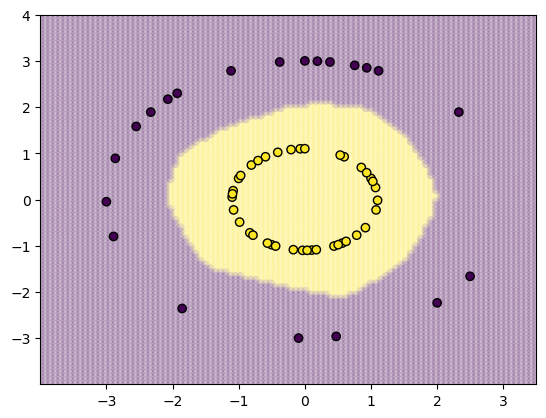

In [69]:
plot_model_prediction(lambda x: model.forward(x), X_test, Y_test)

## 3. Convolutions

---

### 🔲 3.1 Matrix Convolution

**Locally connected layers** learn local correlations using fewer parameters than dense layers.

**Convolutional Layer** is based on **matrix convolution**

### 🖼️ Visualizing Convolution

A picture is worth a thousand words:

![Image convolution](./src/conv.png)

### 📐 Mathematical Definition

**Process:**
1. A **filter** (or **kernel**) slides over the source matrix
2. Each kernel element multiplies corresponding source element
3. Results are summed and written to target matrix

**Zero Padding:**
- Output is smaller than input (kernel can't overlap borders)
- Solution: Add border of zeros to maintain dimensions
- Allows kernel to process edge pixels

**Formula:**

Given source matrix $X$ of size $N \times M$ and kernel $K$ of size $(2p+1) \times (2q+1)$:

Define $X_{ij} = 0$ for $i > N, i < 1$ and $j > M, j < 1$ (zero padding).

$$
Y = X \star K
$$

$$
Y_{ij} = \sum\limits_{\alpha=0}^{2p} \sum\limits_{\beta=0}^{2q}
K_{\alpha \beta} X_{i + \alpha - p, j+\beta - q}
$$

**Terminology:**
- **Machine Learning:** convolution
- **Mathematics:** cross-correlation

### ✏️ Exercise: Implement Matrix Convolution

Now implement convolution with zero padding:

In [90]:
def w3_conv_matrix(matrix, kernel):
    """Perform the convolution of the matrix
        with the kernel using zero padding
    # Arguments
        matrix: input matrix np.array of size `(N, M)`
        kernel: kernel of the convolution
            np.array of size `(2p + 1, 2q + 1)`
    # Output
        the result of the convolution
        np.array of size `(N, M)`
    """
    N, M = matrix. shape
    k1, k2 = kernel.shape
    p, q = k1 // 2, k2 // 2
    padded = np.pad(matrix, ((p, p), (q, q)), mode='constant')
    
    output = np.array([
        [np.sum(padded[i:i+k1, j:j+k2] * kernel) for j in range(M)]
        for i in range(N)
    ])
    return output

### 🧪 Test Case

Test with the following data:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
2 & 3 & 4 \\
3 & 4 & 5 \\
\end{bmatrix} \quad
K = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 2 \\
\end{bmatrix}
$$

**Expected output:**

$$
X \star K = 
\begin{bmatrix}
7 & 10 & 3 \\
10 & 14 & 6 \\
3 & 6 & 8 \\
\end{bmatrix}
$$

> **Note:** [np.eye](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.eye.html) fills matrix with ones on the diagonal.

In [91]:
X = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])

K = np.eye(3)
K[-1, -1] = 2
print(np.zeros(3))
print(K)

[0. 0. 0.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]


Compare your result with the expected output above:

In [92]:
print(w3_conv_matrix(X, K))

[[ 7. 10.  3.]
 [10. 14.  6.]
 [ 3.  6.  8.]]


In [93]:
am.test_student_function(username, w3_conv_matrix, ["matrix", "kernel"])

Running local tests...
w3_conv_matrix successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 3.2 Basic Kernels

**Image processing with convolution** (like Instagram filters): blur, shift, edge detection, etc.

**📖 Recommended read:** [Interactive Image Kernels Article](http://setosa.io/ev/image-kernels/)

**Predefined Kernels:**

Convolutional layers **learn** kernels through training, but some common kernels exist:

**Sharpen Kernel:** 
$$ 
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 
\end{bmatrix}
$$

**Edge Detection Filter:**
$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 
\end{bmatrix}
$$

**Box Blur (size 3):**
$$ \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 
\end{bmatrix}
$$

Let's experiment with a dog image!

In [94]:
rgb_img = plt.imread("./images/dog.png")
plt.imshow(rgb_img)

**Converting to grayscale:**

Colored images require 3D tensors (RGB). We convert to grayscale for 2D processing:

In [95]:
img = rgb_img.mean(axis=2)
plt.imshow(img, cmap="gray")

### 📦 Box Blur Implementation

**[Box blur](https://en.wikipedia.org/wiki/Box_blur)** - convolution with kernel of size $N \times N$:

$$
\frac{1}{N^2}
\begin{bmatrix}
1 & \dots  & 1\\
\vdots & \ddots & \vdots\\
1 & \dots  & 1\\
\end{bmatrix}
$$

**Interpretation:** Takes the average of an image region

**Arguments:**
- `image` - Input matrix `np.array` of size `(N, M)`
- `box_size` - Kernel size `int > 0` (kernel is `(box_size, box_size)`)

**Output:**  
Blurred image `np.array` of size `(N, M)`

In [98]:
def w3_box_blur(image, box_size):
    """Perform the blur of the image
    # Arguments
        image: input matrix - np.array of size `(N, M)`
        box_size: the size of the blur kernel - int > 0
            the kernel is of size `(box_size, box_size)`
    # Output
        the result of the blur
            np.array of size `(N, M)`
    """
    kernel = np.ones((box_size, box_size)) / (box_size * box_size)
    output = w3_conv_matrix(image, kernel)
    return output

### 🧪 Test Case

Running the code should yield:

$$ 
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 
\end{bmatrix}
$$

In [99]:
test_image = np.array([[9, 0, 9], [0, 0, 0], [9, 0, 9]])

print(w3_box_blur(test_image, 3))

[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


In [100]:
am.test_student_function(username, w3_box_blur, ["image", "box_size"])

Running local tests...
w3_box_blur successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 🐕 Blurring the Dog

Applying box blur to the image:

In [101]:
blur_dog = w3_box_blur(img, box_size=3)
plt.imshow(blur_dog, cmap="gray")

### 🔍 Edge Detection

Computing vertical and horizontal gradients:

$$
K_h = 
\begin{bmatrix}
-1 & 0  & 1\\
\end{bmatrix} \quad
K_v = 
\begin{bmatrix}
1 \\
0 \\
-1\\
\end{bmatrix}
$$

$$
X_h = X \star K_h \quad X_v = X \star K_v
$$

**Gradient amplitude:**

$$
X_\text{grad} = \sqrt{X_h^2 + X_v^2}
$$

In [102]:
dog_h = w3_conv_matrix(blur_dog, np.array([[-1, 0, 1]]))
dog_v = w3_conv_matrix(blur_dog, np.array([[-1, 0, 1]]).T)
dog_grad = np.sqrt(dog_h**2 + dog_v**2)
plt.imshow(dog_grad, cmap="gray")

This produces edges of the blurred dog. Other edge detection methods include:
- [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector)
- [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator)
- [Prewitt operator](https://en.wikipedia.org/wiki/Prewitt_operator)

### 🎯 Pattern Detection

**Key insight:** Convolving with a kernel produces a **response map**

Higher correlation between image patch and kernel → Higher response

Let's detect a cross pattern:

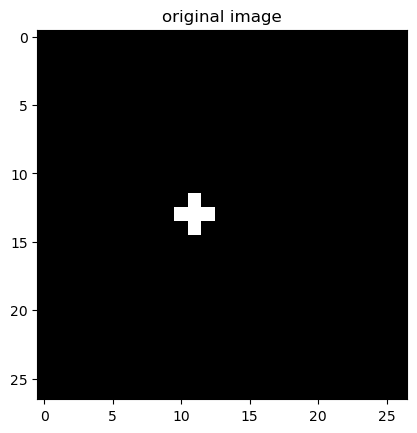

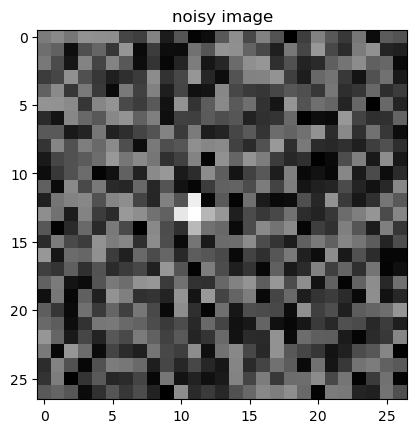

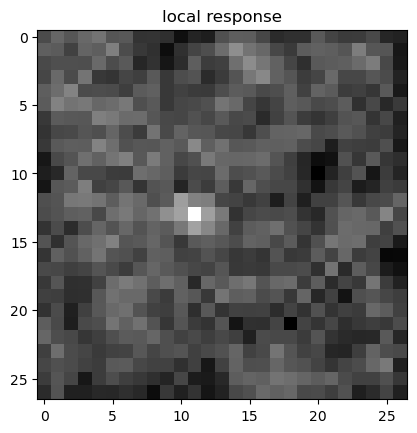

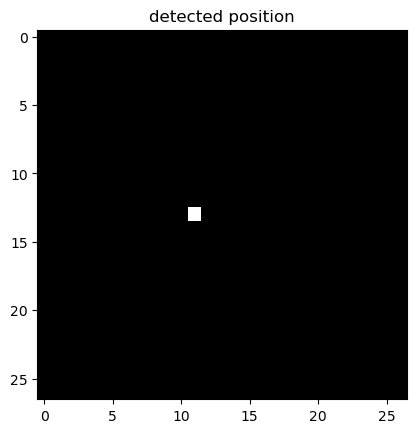

In [103]:
pattern = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
# Create the image
image = np.pad(pattern, [(12, 12), (10, 14)], mode="constant", constant_values=0)
plt.imshow(image, cmap="gray")
plt.title("original image")
plt.show()

# Add some noise
image = 0.5 * image + 0.5 * np.random.random(image.shape)
plt.imshow(image, cmap="gray")
plt.title("noisy image")
plt.show()

# Let's find the cross
response = w3_conv_matrix(image, pattern)
plt.imshow(response, cmap="gray")
plt.title("local response")
plt.show()

plt.imshow(response == response.max(), cmap="gray")
plt.title("detected position")
plt.show()

The brightest pixel shows where the cross is located!

**Application:** Find patterns in images (eyes, legs, dogs, cats, etc.)

**Next step:** Instead of hand-crafting kernels, we can **learn** them by minimizing loss - that's what **Convolutional Layers** do!

### 3.3 Convolutional Layer

**Working with images:** 3D tensors of shape $N_{\text{channels}} \times H \times W$

- `channels` = color channels (3 for RGB, 1 for grayscale)
- $H$ = height
- $W$ = width

**Batch of images:** 4D tensor of shape $N_{\text{objects}} \times N_{\text{channels}} \times H \times W$

**Example:** 32 RGB images of size $224 \times 224$ → shape `(32, 3, 224, 224)`

---

**Convolutional Layer Parameters:**

- **Kernels:** Tensor of size `(n_in, n_out, kernel_h, kernel_w)`
- **Input:** `(n_objects, n_in, H, W)`
- **Output:** `(n_objects, n_out, H, W)`

**Process:**
1. To get 1st output channel: convolve all input channels with their kernels
2. Sum the results
3. Write to output channel

**Pseudocode:**
```python
for i in range(n_out):
    out_channel = 0.0
    for j in range(n_in):
        kernel_2d = K[i, j]
        input_channel = input_image[j]
        out_channel += conv_matrix(input_channel, kernel_2d)
    output_image.append(out_channel)
```

> **Implementation:** Provided for you. Backward pass uses matrix multiplication representation.

In [104]:
class ConvLayer(Layer):
    """
    Convolutional Layer. The implementation is based on
        the representation of the convolution as matrix multiplication
    """

    def __init__(self, n_in, n_out, filter_size):
        super(ConvLayer, self).__init__()
        self.W = np.random.normal(size=(n_out, n_in, filter_size, filter_size))
        self.b = np.zeros(n_out)

    def forward(self, x_input):
        n_obj, n_in, h, w = x_input.shape
        n_out = len(self.W)

        self.output = []

        for image in x_input:
            output_image = []
            for i in range(n_out):
                out_channel = 0.0
                for j in range(n_in):
                    out_channel += w3_conv_matrix(image[j], self.W[i, j])
                output_image.append(out_channel)
            self.output.append(np.stack(output_image, 0))

        self.output = np.stack(self.output, 0)
        return self.output

    def backward(self, x_input, grad_output):

        N, C, H, W = x_input.shape
        F, C, HH, WW = self.W.shape

        pad = int((HH - 1) / 2)

        self.grad_b = np.sum(grad_output, (0, 2, 3))

        # pad input array
        x_padded = np.pad(x_input, ((0, 0), (0, 0), (pad, pad), (pad, pad)), "constant")
        H_padded, W_padded = x_padded.shape[2], x_padded.shape[3]
        # naive implementation of im2col
        x_cols = None
        for i in range(HH, H_padded + 1):
            for j in range(WW, W_padded + 1):
                for n in range(N):
                    field = x_padded[n, :, i - HH : i, j - WW : j].reshape((1, -1))
                    if x_cols is None:
                        x_cols = field
                    else:
                        x_cols = np.vstack((x_cols, field))

        x_cols = x_cols.T

        d_out = grad_output.transpose(1, 2, 3, 0)
        dout_cols = d_out.reshape(F, -1)

        dw_cols = np.dot(dout_cols, x_cols.T)
        self.grad_W = dw_cols.reshape(F, C, HH, WW)

        w_cols = self.W.reshape(F, -1)
        dx_cols = np.dot(w_cols.T, dout_cols)

        dx_padded = np.zeros((N, C, H_padded, W_padded))
        idx = 0
        for i in range(HH, H_padded + 1):
            for j in range(WW, W_padded + 1):
                for n in range(N):
                    dx_padded[n : n + 1, :, i - HH : i, j - WW : j] += dx_cols[
                        :, idx
                    ].reshape((1, C, HH, WW))
                    idx += 1
            dx = dx_padded[:, :, pad:-pad, pad:-pad]
        grad_input = dx
        return grad_input

    def get_params(self):
        return [self.W, self.b]

    def get_params_gradients(self):
        return [self.grad_W, self.grad_b]

**Example:** Transform 3-channel images to 8-channel images using `3×3` kernels:

In [105]:
conv_layer = ConvLayer(3, 8, filter_size=3)

### 3.4 Pooling Layer

**Purpose:** Reduce image size (downsampling)

**Max Pooling:** Most common pooling operation

![Pooling](./src/pool.png)

**Effect:**
- Reduces spatial dimensions by half (with $2 \times 2$ windows)
- **No effect on depth** (number of channels)

**Process:**
- Split image into windows
- Take maximum value from each window
- Use as output

![Max Pooling](./src/maxpool.png)

In [106]:
def w3_maxpool_forward(x_input):
    """Perform max pooling operation with 2x2 window
    # Arguments
        x_input: np.array of size (2 * W, 2 * H)
    # Output
        output: np.array of size (W, H)
    """
    H, W = x_input.shape
    h, w = H //2, W //2
    output = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            output[i, j] = np.max(x_input[2*i:2*i+2, 2*j:2*j+2])
    return output

### 🧪 Test Case

**Input:**
$$ 
\begin{bmatrix}
1 & 1 & 2 & 4 \\
5 & 6 & 7 & 8 \\
3 & 2 & 1 & 0 \\
1 & 2 & 3 & 4
\end{bmatrix}
$$

**Expected output:**
$$ 
\begin{bmatrix}
6 & 8 \\
3 & 4
\end{bmatrix}
$$

In [107]:
test_image = np.array([[1, 1, 2, 4], [5, 6, 7, 8], [3, 2, 1, 0], [1, 2, 3, 4]])

print(w3_maxpool_forward(test_image))

[[6. 8.]
 [3. 4.]]


In [108]:
am.test_student_function(username, w3_maxpool_forward, ["x_input"])

Running local tests...
w3_maxpool_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


### 🔙 Gradient Implementation

Backward pass already implemented. Read the code to understand the concept:

In [109]:
def maxpool_grad_input(x_input, grad_output):
    """Calculate partial derivative of the loss with respect to the input
    # Arguments
        x_input: np.array of size (2 * W, 2 * H)
        grad_output: partial derivative of the loss
            with respect to the output
            np.array of size (W, H)
    # Output
        output: partial derivative of the loss
            with respect to the input
            np.array of size (2 * W, 2 * H)
    """
    height, width = x_input.shape
    # create the array of zeros of the required size
    grad_input = np.zeros(x_input.shape)

    # let's put 1 if the element with this position
    # is maximal in the window
    for i in range(0, height, 2):
        for j in range(0, width, 2):
            window = x_input[i : i + 2, j : j + 2]
            i_max, j_max = np.unravel_index(np.argmax(window), (2, 2))
            grad_input[i + i_max, j + j_max] = 1

    # put corresponding gradient instead of 1
    grad_input = grad_input.ravel()
    grad_input[grad_input == 1] = grad_output.ravel()
    grad_input = grad_input.reshape(x_input.shape)
    return grad_input

**Complete MaxPool2x2 Layer implementation:**

In [110]:
class MaxPool2x2(Layer):

    def forward(self, x_input):
        n_obj, n_ch, h, w = x_input.shape
        self.output = np.zeros((n_obj, n_ch, h // 2, w // 2))
        for i in range(n_obj):
            for j in range(n_ch):
                self.output[i, j] = w3_maxpool_forward(x_input[i, j])
        return self.output

    def backward(self, x_input, grad_output):
        n_obj, n_ch, _, _ = x_input.shape
        grad_input = np.zeros_like(x_input)
        for i in range(n_obj):
            for j in range(n_ch):
                grad_input[i, j] = maxpool_grad_input(x_input[i, j], grad_output[i, j])
        return grad_input

### 3.5 Flatten

**Purpose:** Bridge convolutional and dense layers

**Problem:**
- Convolutional layers work with 4D tensors
- Dense layers work with 2D matrices (matrices)

**Solution:** Flatten layer reshapes tensors

**Transformation:**
- **Input:** `(n_obj, n_channels, h, w)`
- **Output:** `(n_obj, n_channels * h * w)`

**Backward pass:** Simply reshape back (no value changes)

**Implementation:** Use [np.reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html)

In [112]:
def w3_flatten_forward(x_input):
    """Perform the reshaping of the tensor of size `(K, L, M, N)`
        to the tensor of size `(K, L*M*N)`
    # Arguments
        x_input: np.array of size `(K, L, M, N)`
    # Output
        output: np.array of size `(K, L*M*N)`
    """
    k = x_input.shape[0]
    output = x_input.reshape((k, -1))
    return output

### 🧪 Test Case

Expected shape: `(100, 768)`

> **Note:** We use [np.zeros](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.zeros.html) to test shape transformation.

In [113]:
test_input = np.zeros((100, 3, 16, 16))

print(w3_flatten_forward(test_input).shape)

(100, 768)


In [114]:
am.test_student_function(username, w3_flatten_forward, ["x_input"])

Running local tests...
w3_flatten_forward successfully passed local tests
Running remote test...
Test was successful. Congratulations!


In [115]:
def flatten_grad_input(x_input, grad_output):
    """Calculate partial derivative of the loss with respect to the input
    # Arguments
        x_input: np.array of size `(K, L, M, N)`
        grad_output: partial derivative of the loss
            with respect to the output
            np.array of size `(K, L*M*N)`
    # Output
        output: partial derivative of the loss
            with respect to the input
            np.array of size `(K, L, M, N)`
    """
    grad_input = grad_output.reshape(x_input.shape)
    return grad_input

**Complete Flatten Layer implementation:**

In [116]:
class FlattenLayer(Layer):

    def forward(self, x_input):
        self.output = w3_flatten_forward(x_input)
        return self.output

    def backward(self, x_input, grad_output):
        output = flatten_grad_input(x_input, grad_output)
        return output

## 4. Image Experiments

---

### 🎯 Training with Mini-Batches

**Strategy:** Feed small portions of dataset (mini-batches) one-by-one to the network

**Benefit:** More efficient training and better generalization

In [117]:
import sys


def iterate_minibatches(x, y, batch_size=16, verbose=True):
    assert len(x) == len(y)

    indices = np.arange(len(x))
    np.random.shuffle(indices)

    for i, start_idx in enumerate(range(0, len(x) - batch_size + 1, batch_size)):
        if verbose:
            print("\rBatch: {}/{}".format(i + 1, len(x) // batch_size), end="")
            sys.stdout.flush()

        excerpt = indices[start_idx : start_idx + batch_size]
        yield x[excerpt], y[excerpt]

### 📊 Loading MNIST Dataset

[Download MNIST dataset](http://yann.lecun.com/exdb/mnist/) first.

> **Note:** Unpack downloaded files if you encounter loading errors.

In [118]:
from dataset_utils import load_mnist

/Users/lindou/Desktop/UvA-AML-2025-Lin/week_3/dataset_utils.py:18: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if dataset is "training":
/Users/lindou/Desktop/UvA-AML-2025-Lin/week_3/dataset_utils.py:21: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif dataset is "testing":


In [121]:
train = list(load_mnist(dataset="training", path="."))
train
train_images = np.array([im[1] for im in train])
train_targets = np.array([im[0] for im in train])
# We will train a 0 vs. 1 classifier
x_train = train_images[train_targets < 2][:1000]
y_train = train_targets[train_targets < 2][:1000]

y_train = y_train
y_train = y_train.reshape((-1, 1))

### 🔢 About MNIST

**MNIST dataset:**
- Grayscale images (single channel)
- Size: `28×28` pixels
- RGB values: 0-255
- Total: 784 pixels per image

**Single image visualization:**

In [122]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray_r")

### 🔧 Preprocessing

**Steps:**
1. **Normalize** values to [0, 1] for easier optimization
2. **Reshape** to add channel dimension `(n_images, 1, 28, 28)`

The visual appearance remains unchanged:

In [123]:
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape((-1, 1, 28, 28))
plt.imshow(x_train[0].reshape(28, 28), cmap="gray_r")

### 🏗️ Building a CNN

Training a simple convolutional neural network:

In [124]:
def get_cnn():
    nn = SequentialNN(
        ConvLayer(1, 2, filter_size=3),  # The output is of size [N_obj 2 28 28]
        ReLU(),  # The output is of size [N_obj 2 28 28]
        MaxPool2x2(),  # The output is of size [N_obj 2 14 14]
        ConvLayer(2, 4, filter_size=3),  # The output is of size [N_obj 4 14 14]
        ReLU(),  # The output is of size [N_obj 4 14 14]
        MaxPool2x2(),  # The output is of size [N_obj 4 7 7]
        FlattenLayer(),  # The output is of size [N_obj 196]
        Dense(4 * 7 * 7, 8),
        ReLU(),
        Dense(8, 1),
        Sigmoid(),
    )
    return nn

In [125]:
nn = get_cnn()
loss = NLL()
optimizer = SGD(nn, weight_decay=0.0)

In [126]:
# It will train for about 5 minutes
num_epochs = 5
batch_size = 32
# We will store the results here
history = {"loss": [], "accuracy": []}

# `num_epochs` represents the number of iterations
for epoch in range(num_epochs):
    print("Epoch {}/{}".format(epoch + 1, num_epochs))

    # We perform iteration a one-by-one iteration of the mini-batches
    for x_batch, y_batch in iterate_minibatches(x_train, y_train, batch_size):
        # Predict the target value
        y_pred = nn.forward(x_batch)
        # Compute the gradient of the loss
        loss_grad = loss.backward(y_pred, y_batch)
        # Perform backwards pass
        nn.backward(x_batch, loss_grad)
        # Update the params
        optimizer.update_params()

        # Save loss and accuracy values
        history["loss"].append(loss.forward(y_pred, y_batch))
        prediction_is_correct = (y_pred > 0.5) == (y_batch > 0.5)
        history["accuracy"].append(np.mean(prediction_is_correct))

    print()

Epoch 1/5
Batch: 31/31
Epoch 2/5
Batch: 31/31
Epoch 3/5
Batch: 31/31
Epoch 4/5
Batch: 31/31
Epoch 5/5
Batch: 31/31


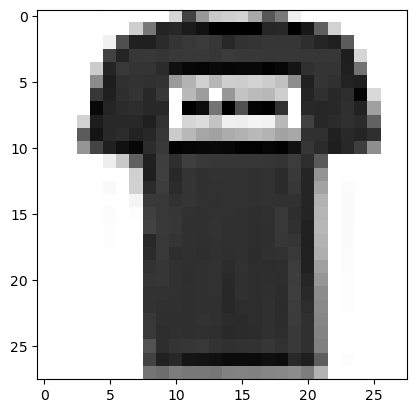

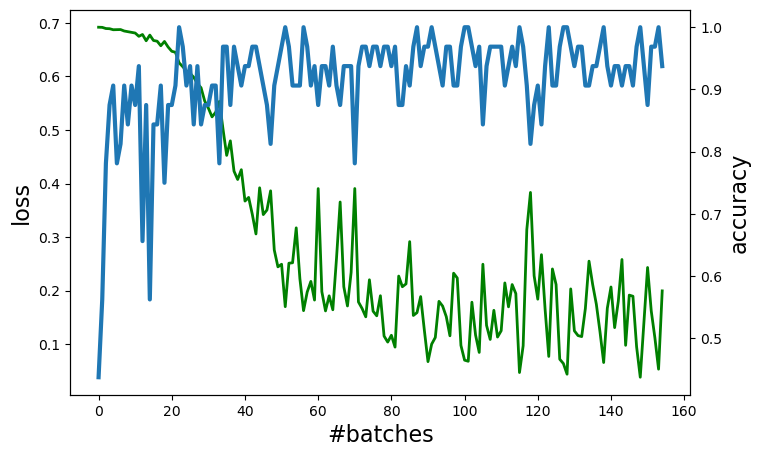

In [127]:
# Let's plot the results to get a better insight
plt.figure(figsize=(8, 5))

ax_1 = plt.subplot()
ax_1.plot(history["loss"], c="g", lw=2, label="train loss")
ax_1.set_ylabel("loss", fontsize=16)
ax_1.set_xlabel("#batches", fontsize=16)

ax_2 = plt.twinx(ax_1)
ax_2.plot(history["accuracy"], lw=3, label="train accuracy")
ax_2.set_ylabel("accuracy", fontsize=16)
plt.show()

### 💭 Experiments to Try

**Batch size variations:**
- `batch_size=1` - What happens?
- `batch_size=1000` - What happens?
- Does computation speed depend on batch size? Why?

**Number of epochs:**
- `num_epochs=1` - What happens?
- `num_epochs=1000` - What happens?
- How does it affect computation time, resources, and accuracy?

### 🔬 Visualizing Activations

Let's visualize intermediate layer activations to understand what the network learns:

In [128]:
viz_images = x_batch[:2]
_ = nn.forward(viz_images)

activations = {
    "conv_1": nn.layers[0].output,
    "relu_1": nn.layers[1].output,
    "pool_1": nn.layers[2].output,
    "conv_2": nn.layers[3].output,
    "relu_2": nn.layers[4].output,
    "pool_2": nn.layers[5].output,
}

### Input Images

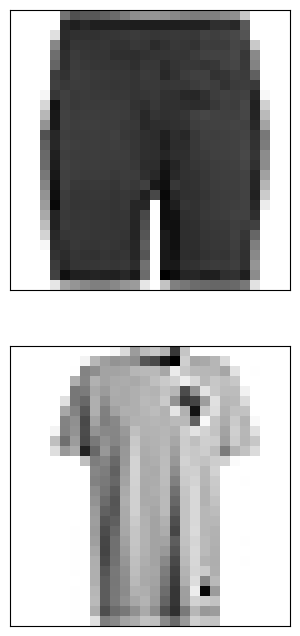

In [129]:
# Input
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 8))

ax1.imshow(viz_images[0, 0], cmap=plt.cm.gray_r)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(viz_images[1, 0], cmap=plt.cm.gray_r)
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

### Activations of Conv 1

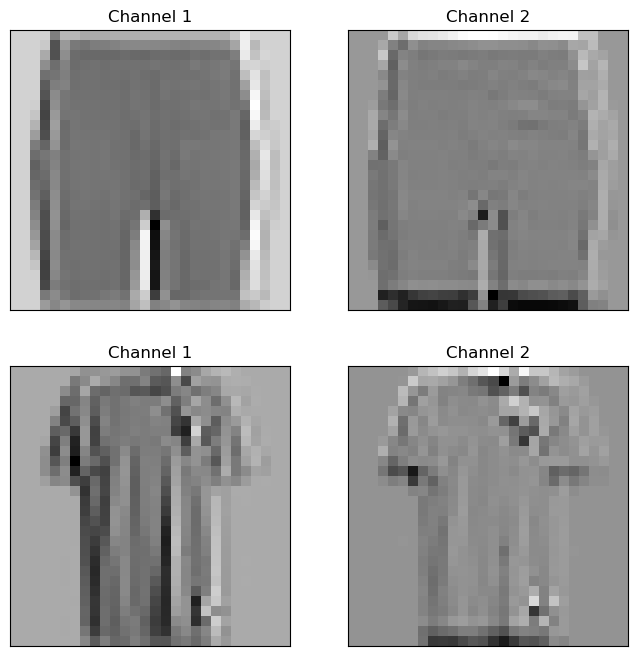

In [130]:
# Conv 1
f, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        ax.imshow(activations["conv_1"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### Activations of ReLU 1

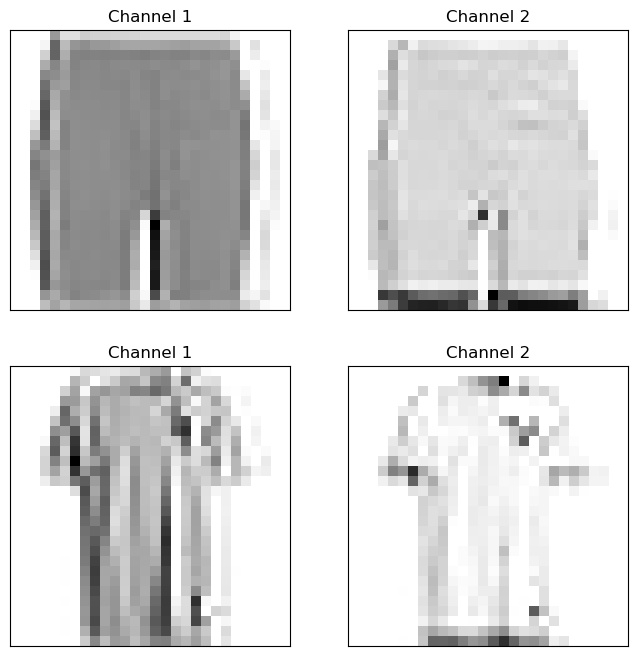

In [131]:
# ReLU 1
f, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        ax.imshow(activations["relu_1"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### Activations of MaxPooling 1

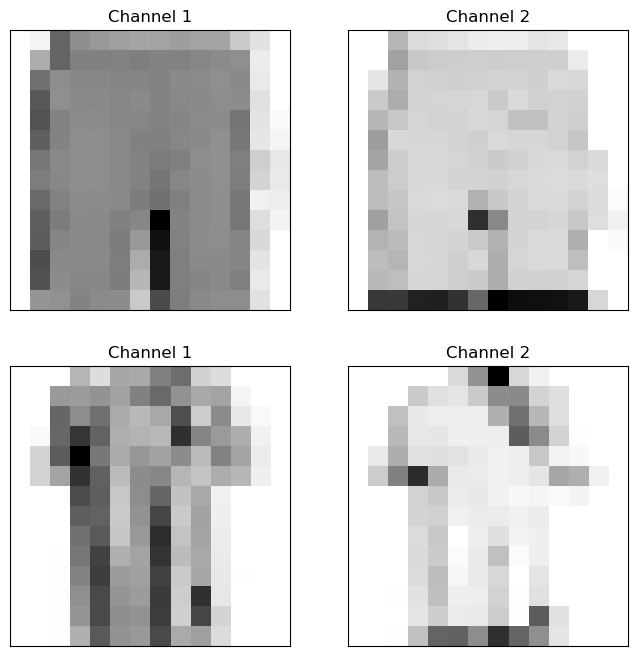

In [132]:
# Max Pooling 1
f, axes = plt.subplots(2, 2, figsize=(8, 8))

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        ax.imshow(activations["pool_1"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### Activations of Conv 2

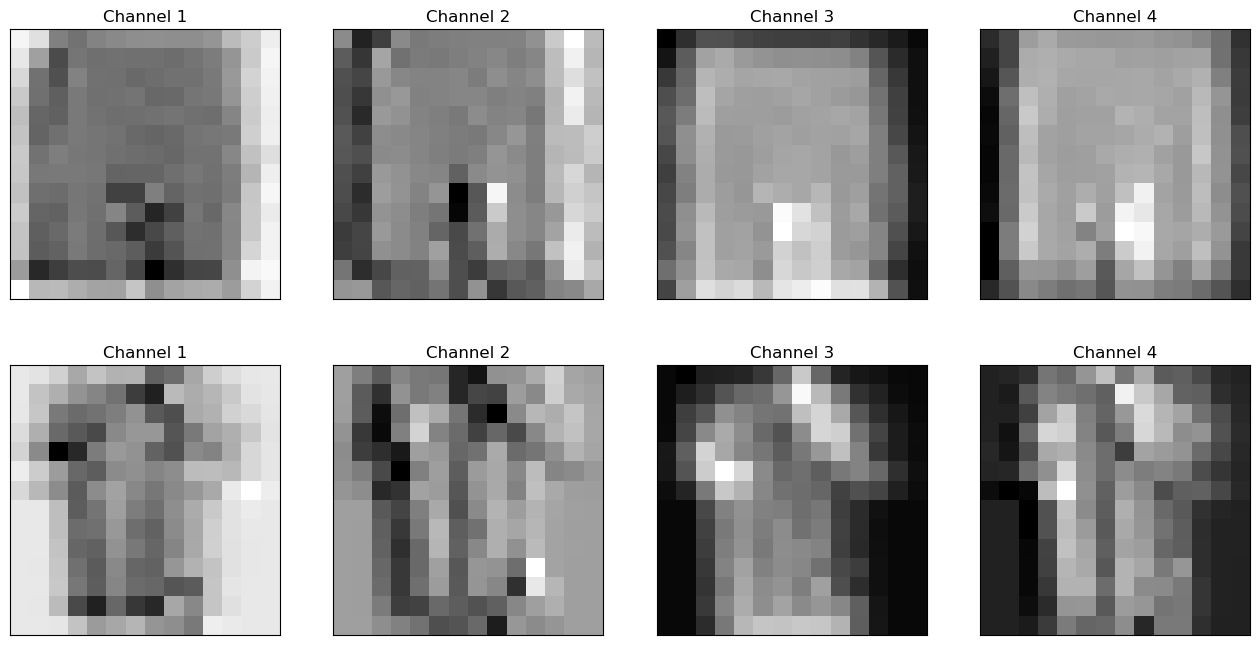

In [133]:
# Conv 2
f, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(2):
    for j in range(4):
        ax = axes[i, j]
        ax.imshow(activations["conv_2"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### Activations of ReLU 2

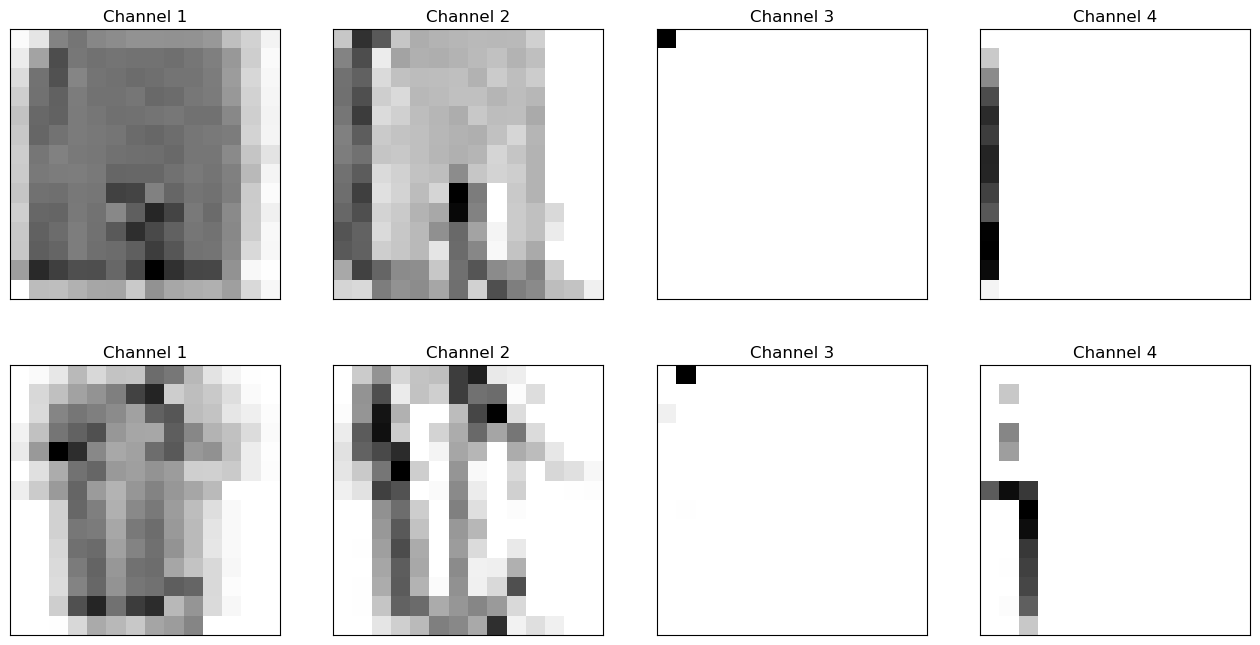

In [134]:
# ReLU 2
f, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(2):
    for j in range(4):
        ax = axes[i, j]
        ax.imshow(activations["relu_2"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### Activations of MaxPooling 2

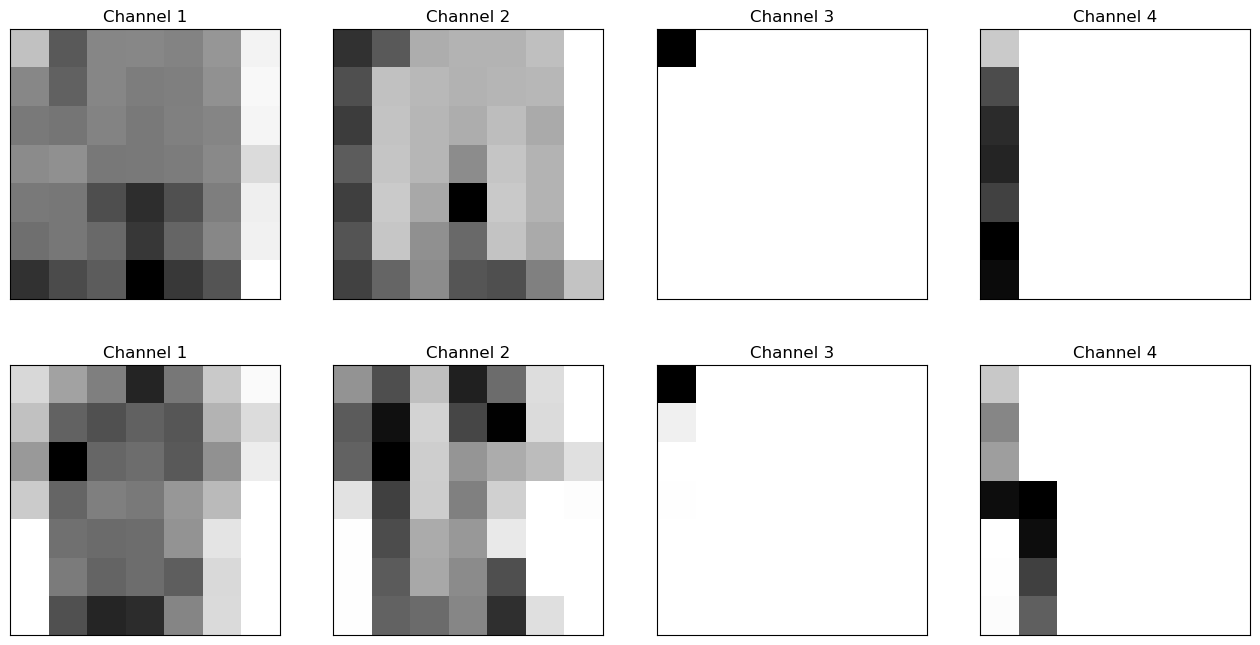

In [135]:
# Max Pooling 2
f, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(2):
    for j in range(4):
        ax = axes[i, j]
        ax.imshow(activations["pool_2"][i, j], cmap=plt.cm.gray_r)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Channel {}".format(j + 1))

plt.show()

### 🧠 Understanding Deep Features

As we go deeper in the network:
- Images become **less locally-correlated** (neighboring pixels less dependent)
- Features become more **semantically meaningful**
- Each pixel stores more **useful information** about the object
- Dense layers at the end analyze these high-level features

### 🎨 More Experiments to Try

**Architecture variations:**
- Change number of kernels
- Vary kernel sizes
- Add/remove layers

Experiment and observe how performance changes!